<div style="border-radius:10px; padding: 30px; background-color: #c0e5e9; font-size:90%; text-align:left">
    <p style="font-family:Georgia; font-size:400%;font-weight:bold;text-align:center;color:navy;">
        🍚 Rice Image Classification 🌾
    </p>
<p style="font-family:'Times New Roman', Times, serif; font-size:300%;font-weight:bold;text-align:center;color:navy;">
        🧠 Built with PyTorch 🖥️
    </p>
<p style="font-family:'Times New Roman', Times, serif; font-size:200%;font-weight:bold;text-align:center;color:navy;">
        Developed by: Hamed Mahmoudi 👨‍💻
    </p>
</div>

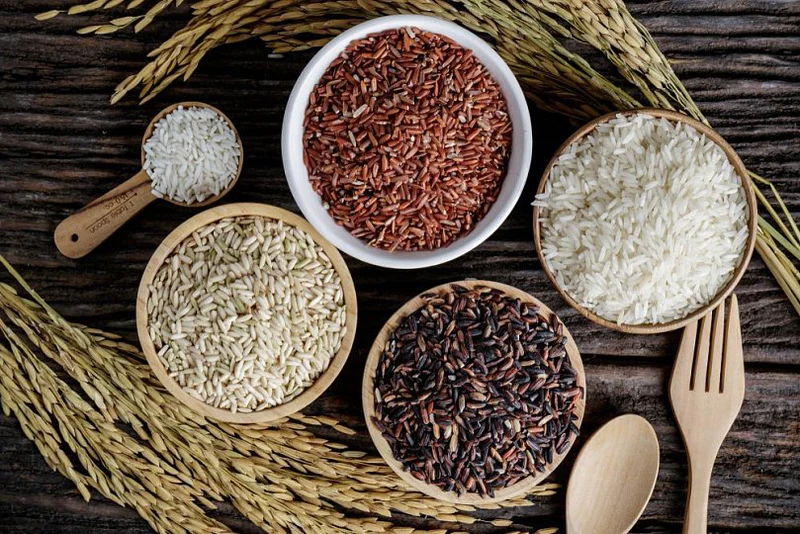

<div style="border-radius:10px; padding: 15px; background-color: #c0e5e9; font-size:115%; text-align:left">
    <h3 align="left"><font color="navy">🍚 Rice Image Classification Project 🍚</font></h3>
    <p style="color:navy;">
        This project focuses on classifying different types of rice grains, including Arborio, Basmati, Jasmine, Ipsala, and Karacadag. 
        Using a custom Convolutional Neural Network (CNN) built with PyTorch, 
        we aim to achieve accurate rice variety classification by training the model on a large dataset of rice images.
        <br><br>
    </p>
</div>


<a id="c_table"></a> 



<div style="border-radius:10px; padding: 15px; background-color: #c0e5e9; font-size:115%; text-align:left">



<h3 align="left"><font color=navy>Table of Contents:</font></h3>

<font color=navy>

        

* [1 | Libraries📚](#lib)
* [2 | Importing Dataset🗄 and processing it 📖](#data)
* [3 | Visualizing📈](#Visualizing)
* [4 | Custom Model📊](#custom)

<a id="lib"></a>

# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">1 - Libraries 📚</p>



⬆️ [Table of Contents](#c_table)

In [1]:
!pip install -q split-folders --upgrade
!pip install -q torchviz --upgrade
!pip install -q torchsummary --upgrade

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from termcolor import colored
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchviz import make_dot
from torchsummary import summary

import splitfolders
import warnings

warnings.filterwarnings('ignore')

<a id="data"></a>

# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">2 - Importing Dataset🗄 and processing it 📖</p>

⬆️ [Table of Contents](#c_table)

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
  <font color=navy>
    <p style="color:navy;">
      In this step, we examine the dataset's structure and split it into training and validation sets. 
      This helps us prepare the data for training the model effectively. The analysis involves the following steps:
    </p>
    <ul>
      <li>Checking the <strong>distribution of samples</strong> across different rice varieties (Arborio, Basmati, Jasmine, Ipsala, and Karacadag).</li>
      <li>Splitting the dataset into <strong>75% training</strong> and <strong>25% validation</strong> sets using a fixed random seed for reproducibility.</li>
      <li>Applying transformations such as <strong>resizing, normalization,</strong> and <strong>random horizontal flipping</strong> to standardize the input data.</li>
      <li>Loading the processed datasets into <strong>DataLoader</strong> objects for efficient batch processing during model training and evaluation.</li>
      <li>Verifying the number of samples and class labels in the training and validation sets to ensure the data split is correct.</li>
    </ul>
  </font>
</div>


In [3]:
# Specify your dataset folder
dataset_folder = "/kaggle/input/rice-image-dataset/Rice_Image_Dataset"

# List all subdirectories (classes) in the dataset folder
classes = os.listdir(dataset_folder)

# Dictionary to store the count of images in each class
image_counts = {}

# Loop through each class folder and count the number of images
for class_name in classes:
    class_folder = os.path.join(dataset_folder, class_name)
    
    # Check if the path is a directory
    if os.path.isdir(class_folder):
        # Count the number of files (images) in the class folder
        num_images = len(os.listdir(class_folder))
        image_counts[class_name] = num_images

# Print the count of images for each class
for class_name, count in image_counts.items():
    print(f"Class '{class_name}' has {count} images.")

Class 'Karacadag' has 15000 images.
Class 'Basmati' has 15000 images.
Class 'Jasmine' has 15000 images.
Class 'Arborio' has 15000 images.
Class 'Ipsala' has 15000 images.


In [4]:
splitfolders.ratio(
    input=dataset_folder, output='images', seed=42, ratio=(0.75, 0.25)
)

Copying files: 75000 files [07:35, 164.75 files/s]


In [5]:
train_transforms = transforms.Compose([
    transforms.Resize((250, 250)),  
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize using ImageNet stats
])

val_transforms = transforms.Compose([
    transforms.Resize((250, 250)), 
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [6]:
train_data = ImageFolder('/kaggle/working/images/train', transform=train_transforms)
train_dataset = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=4)

print(colored("train Folder:\n", "magenta"))
print(f"Number of samples: {len(train_data)}")
print(f"Number of classes: {len(train_data.classes)}\n")

train Folder:

Number of samples: 56250
Number of classes: 5



In [7]:
validation_data = ImageFolder('/kaggle/working/images/val', transform=val_transforms)
validation_dataset = DataLoader(validation_data, batch_size=64, shuffle=True, num_workers=4)

print(colored("validation Folder:\n", "magenta"))
print(f"Number of samples: {len(validation_data)}")
print(f"Number of classes: {len(validation_data.classes)}\n")

validation Folder:

Number of samples: 18750
Number of classes: 5



<a id="Visualizing"></a>

# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">4 - Visualizing📈</p>



⬆️ [Table of Contents](#c_table)

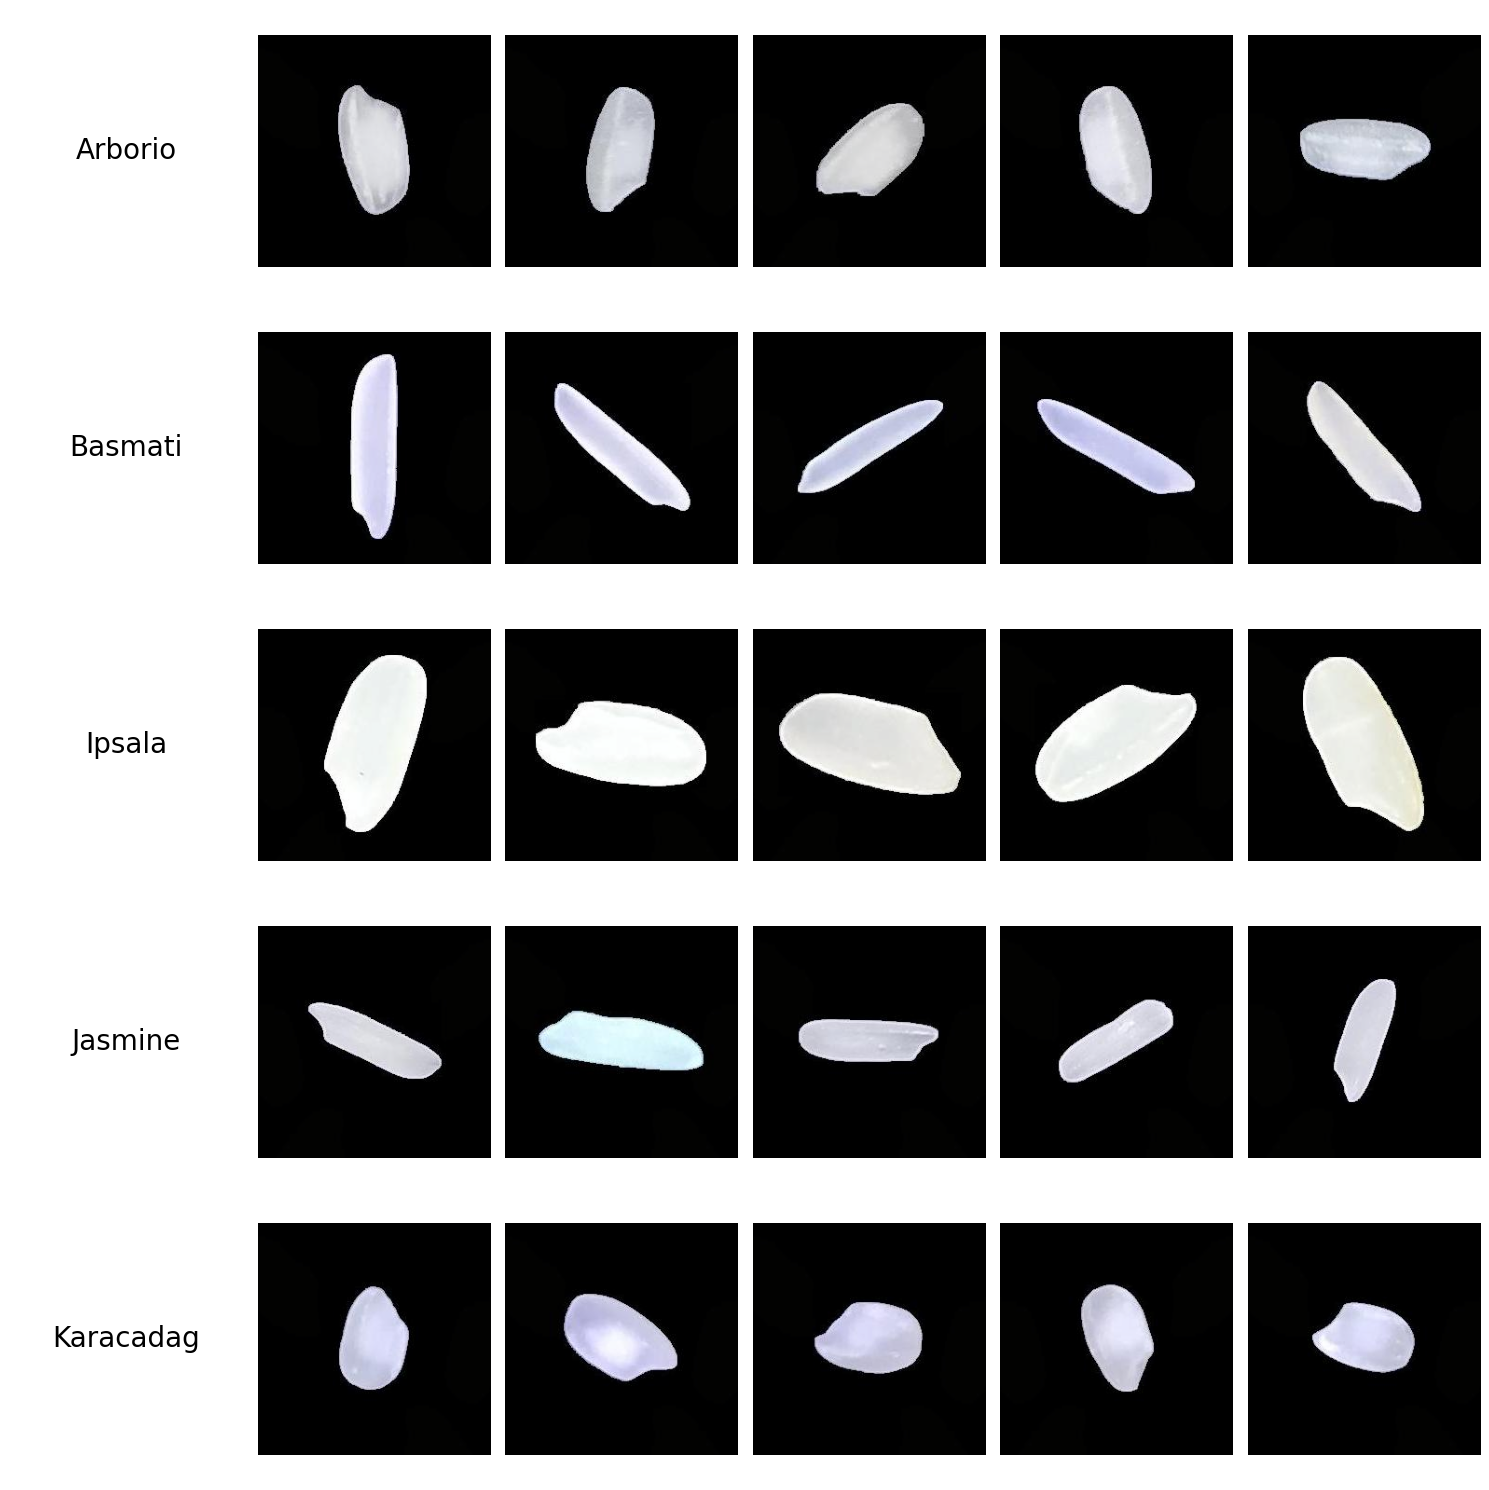

In [8]:
# Helper function to unnormalize and display an image
def imshow(image):
    # Unnormalize the image
    image = image.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean  # De-normalize
    image = np.clip(image, 0, 1)
    return image

# Set up the figure size
plt.figure(figsize=(15, len(train_data.classes) * 3))

# Iterate through each class
for class_index, class_name in enumerate(train_data.classes):
    count = 0  # Counter for number of images displayed per class

    # Iterate through the DataLoader
    for images, labels in train_dataset:
        # Iterate through images in the batch
        for i in range(len(labels)):
            # Check if the current image belongs to the current class
            if labels[i].item() == class_index:
                if count == 0:
                    # Display the class name in the first column
                    plt.subplot(len(train_data.classes), 6, class_index * 6 + 1)
                    plt.text(0.5, 0.5, class_name, ha='center', va='center', fontsize=20)
                    plt.axis("off")

                # Display the image
                plt.subplot(len(train_data.classes), 6, class_index * 6 + count + 2)
                plt.imshow(imshow(images[i]))
                plt.axis("off")

                count += 1
                if count == 5:  # Display only 5 images per class
                    break

        if count == 5:
            break

plt.tight_layout()
plt.show()

<a id="custom"></a>

# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">5 - Custom Model📊</p>



⬆️ [Table of Contents](#c_table)

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
  <font color=navy>
    <p style="color:navy;">
      In this phase, we define a custom Convolutional Neural Network (CNN) architecture using PyTorch for the rice image classification task. 
      The process includes several steps:
    </p>
    <ul>
      <li>Checking for the availability of a <strong>GPU</strong> to accelerate model training and utilizing it if available.</li>
      <li>Defining the <strong>CNN model</strong> with two convolutional layers, followed by batch normalization and fully connected layers.</li>
      <li>Setting up the <strong>loss function</strong> (CrossEntropyLoss) and <strong>optimizer</strong> (Adam) for training.</li>
      <li>Implementing a <strong>training loop</strong> to optimize the model weights over multiple epochs and evaluating on validation data after each epoch.</li>
      <li>Tracking and plotting <strong>accuracy</strong> and <strong>loss</strong> metrics for both training and validation sets to monitor model performance.</li>
      <li>Generating a <strong>confusion matrix</strong> to evaluate the model's performance in classifying each rice variety and identifying potential misclassifications.</li>
    </ul>
  </font>
</div>


In [9]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self, num_classes=5):
        super(CNNModel, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=128, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, padding=1)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Batch normalization layers
        self.batch_norm1 = nn.BatchNorm2d(128)
        self.batch_norm2 = nn.BatchNorm2d(64)
        
        # Calculate the flattened size after two convolutions and pooling
        self.flatten_size = 64 * 62 * 62  # 250x250 -> 62x62 after 2 pooling layers
        
        # Fully connected layers
        self.fc1 = nn.Linear(self.flatten_size, 128)  # Flattened size calculation
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, num_classes)

    def forward(self, x):
        # First convolutional block
        x = self.pool(F.relu(self.conv1(x)))
        x = self.batch_norm1(x)
        
        # Second convolutional block
        x = self.pool(F.relu(self.conv2(x)))
        x = self.batch_norm2(x)
        
        # Flatten the output
        x = x.view(x.size(0), -1)  # Flatten for fully connected layers
        
        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # Output layer without activation (will use CrossEntropyLoss)

        return x

# Instantiate the model
model = CNNModel(num_classes=5).to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

Using device: cuda


In [10]:
model.to(device)

# Print the summary (assuming input size is 3x224x224 for RGB images)
summary(model, (3, 250, 250))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 128, 250, 250]           3,584
         MaxPool2d-2        [-1, 128, 125, 125]               0
       BatchNorm2d-3        [-1, 128, 125, 125]             256
            Conv2d-4         [-1, 64, 125, 125]          73,792
         MaxPool2d-5           [-1, 64, 62, 62]               0
       BatchNorm2d-6           [-1, 64, 62, 62]             128
            Linear-7                  [-1, 128]      31,490,176
            Linear-8                   [-1, 32]           4,128
            Linear-9                    [-1, 5]             165
Total params: 31,572,229
Trainable params: 31,572,229
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.72
Forward/backward pass size (MB): 102.94
Params size (MB): 120.44
Estimated Total Size (MB): 224.09
-------------------------------

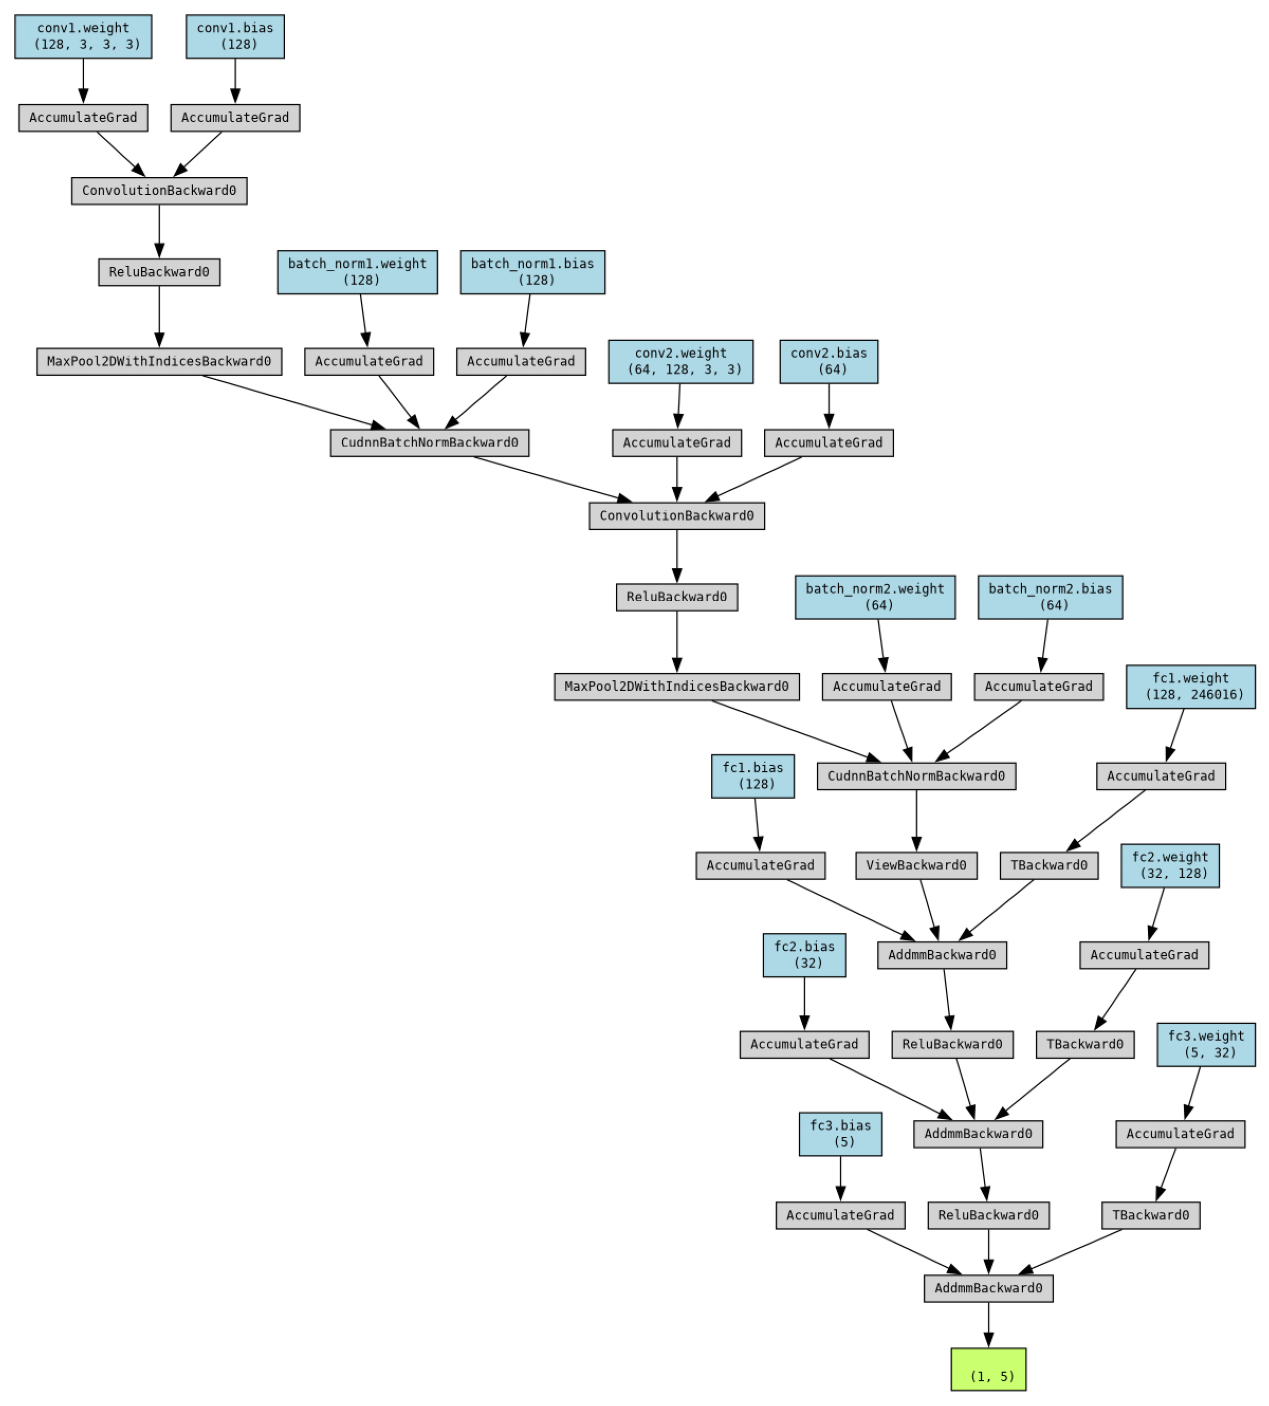

In [11]:
# Example input tensor (batch size of 1, 3 channels, 224x224 image)
sample_input = torch.randn(1, 3, 250, 250).to(device)

# Get the model output
output = model(sample_input)

# Generate the graph visualization
model_graph = make_dot(output, params=dict(model.named_parameters())).render("model_architecture", format="png")

# Display the graph
#model_graph.format = "png"
#model_graph.render(view=False)

# To show directly in Jupyter or a notebook environment
plt.figure(figsize=(18, 18))
plt.imshow(plt.imread("model_architecture.png"))
plt.axis("off")
plt.show()

In [12]:
train_dataset = train_dataset  # Your actual training DataLoader
val_dataset = validation_dataset  # Your actual validation DataLoader

# Initialize lists to store accuracy and loss values
train_accuracies = []
val_accuracies = []
train_losses = []

num_epochs = 15

for epoch in range(num_epochs):
    model.train()
    correct_predictions = 0
    total_samples = 0
    running_loss = 0.0

    # Training loop
    for inputs, labels in train_dataset:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        running_loss += loss.item() * inputs.size(0)

    # Calculate and store training accuracy and loss
    train_accuracy = correct_predictions / total_samples
    train_accuracies.append(train_accuracy)
    train_loss = running_loss / total_samples  # Average loss for the epoch
    train_losses.append(train_loss)

    # Validation accuracy
    model.eval()
    correct_predictions = 0
    total_samples = 0
    with torch.no_grad():
        for inputs, labels in val_dataset:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    val_accuracy = correct_predictions / total_samples
    val_accuracies.append(val_accuracy)

    # Print epoch results
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Training Accuracy: {train_accuracy:.4f}, "
          f"Validation Accuracy: {val_accuracy:.4f}, "
          f"Training Loss: {train_loss:.4f}")

Epoch [1/15], Training Accuracy: 0.9654, Validation Accuracy: 0.9794, Training Loss: 0.1647
Epoch [2/15], Training Accuracy: 0.9891, Validation Accuracy: 0.9949, Training Loss: 0.0352
Epoch [3/15], Training Accuracy: 0.9885, Validation Accuracy: 0.8990, Training Loss: 0.0382
Epoch [4/15], Training Accuracy: 0.9913, Validation Accuracy: 0.9297, Training Loss: 0.0303
Epoch [5/15], Training Accuracy: 0.9927, Validation Accuracy: 0.9943, Training Loss: 0.0232
Epoch [6/15], Training Accuracy: 0.9951, Validation Accuracy: 0.9956, Training Loss: 0.0165
Epoch [7/15], Training Accuracy: 0.9931, Validation Accuracy: 0.5639, Training Loss: 0.0233
Epoch [8/15], Training Accuracy: 0.9952, Validation Accuracy: 0.9956, Training Loss: 0.0146
Epoch [9/15], Training Accuracy: 0.9953, Validation Accuracy: 0.9931, Training Loss: 0.0144
Epoch [10/15], Training Accuracy: 0.9960, Validation Accuracy: 0.6265, Training Loss: 0.0145
Epoch [11/15], Training Accuracy: 0.9950, Validation Accuracy: 0.9893, Training

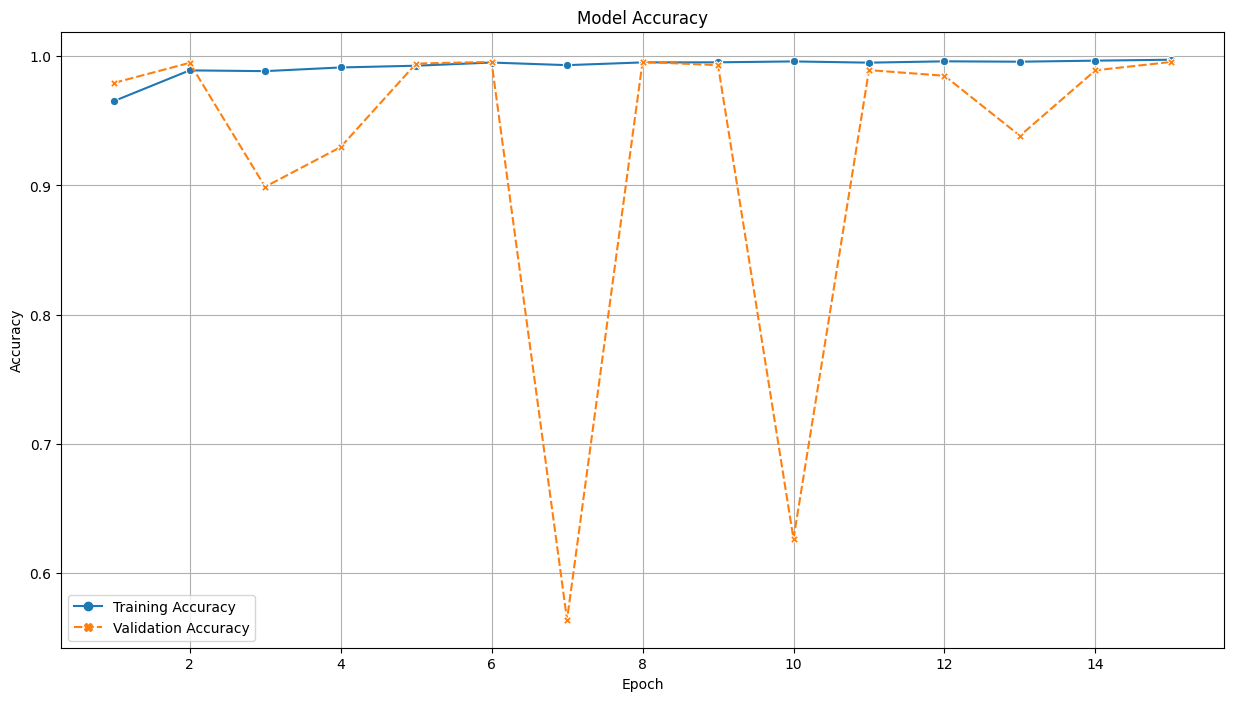

In [13]:
epochs = np.arange(1, len(train_accuracies) + 1)
accuracy_data = pd.DataFrame({
    'Epoch': np.tile(epochs, 2),
    'Accuracy': train_accuracies + val_accuracies,
    'Type': ['Training Accuracy'] * len(train_accuracies) + ['Validation Accuracy'] * len(val_accuracies)
})
    
plt.figure(figsize=(15, 8))
sns.lineplot(x='Epoch', y='Accuracy', hue='Type', style='Type', markers=True, data=accuracy_data)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(title='')
plt.grid(True)
plt.show()

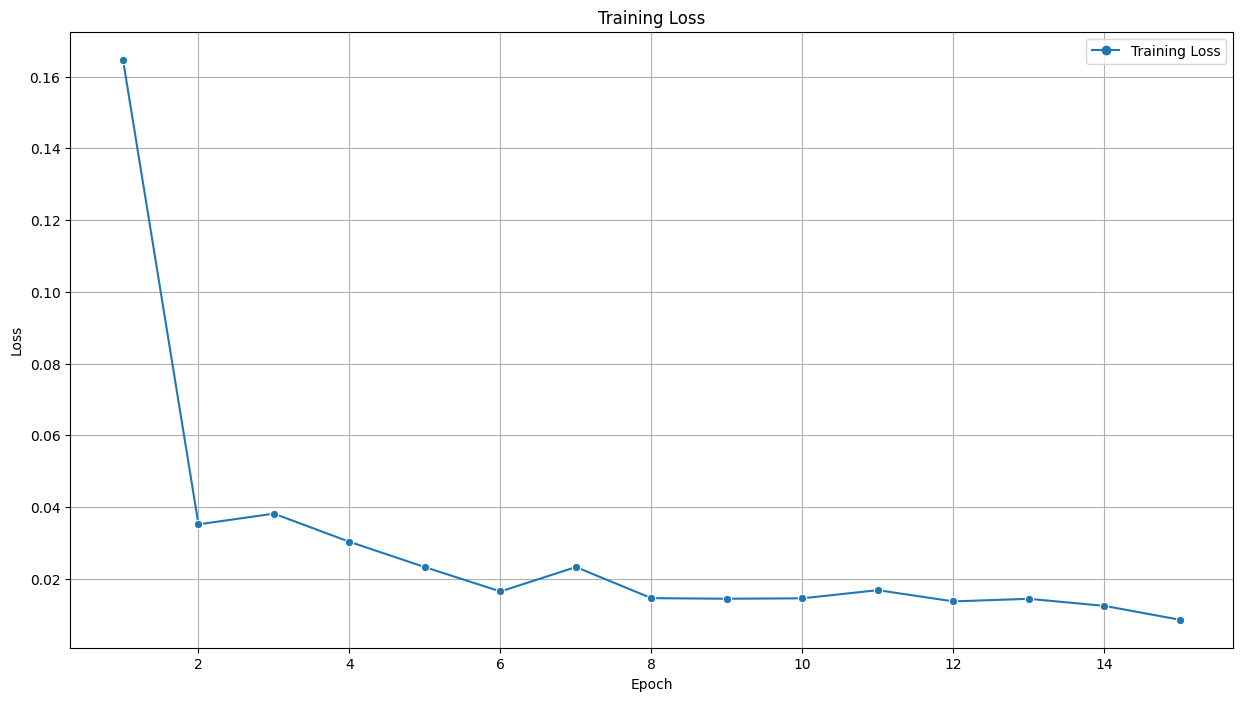

In [14]:
# Create epochs range
epochs = np.arange(1, len(train_losses) + 1)

# Combine losses for training into a DataFrame
loss_data = pd.DataFrame({
    'Epoch': epochs,
    'Loss': train_losses,
    'Type': ['Training Loss'] * len(train_losses)
})

# Plotting the training loss data
plt.figure(figsize=(15, 8))
sns.lineplot(x='Epoch', y='Loss', hue='Type', style='Type', markers=True, data=loss_data)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(title='')
plt.grid(True)
plt.show()

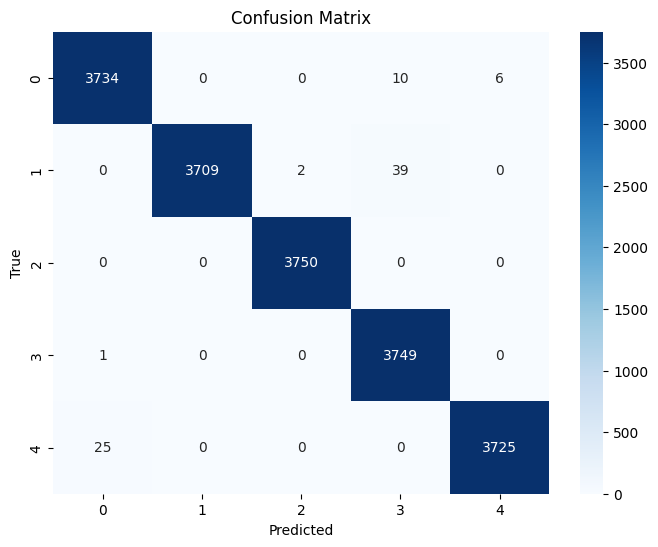

In [15]:
def plot_confusion_matrix(model, val_dataset, device, num_classes=5):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []

    # Iterate over the validation set
    with torch.no_grad():
        for inputs, labels in val_dataset:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Get model predictions
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            # Store predictions and true labels
            all_preds.append(preds.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    # Flatten the list of predictions and labels
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)

    # Generate confusion matrix
    cm = confusion_matrix(all_labels, all_preds, labels=np.arange(num_classes))

    # Plot the confusion matrix using Seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Call the function to plot the confusion matrix for validation data
plot_confusion_matrix(model, val_dataset, device, num_classes=5)